# Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from data import build_features as bf
from data import process_data as pd
from learning_library import logistic_regression as lr

# One Feature: Tumor Radius

### Visualization

Text(0.5, 1.0, 'Tumor Radius Scatter Plot')

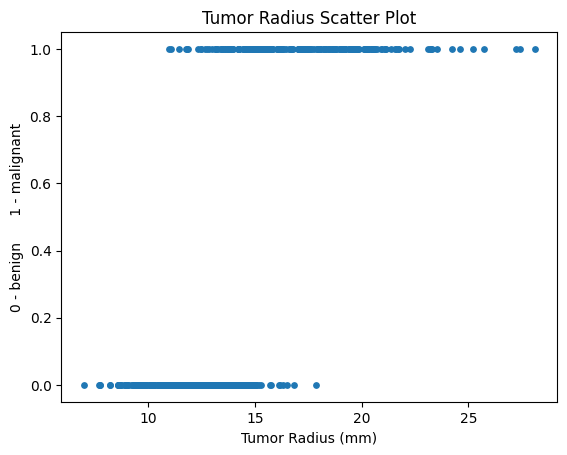

In [2]:
# Obtain X and y data as numpy arrays
X, y = pd.generate_data()

# Scatter plot of first feature - tumor radius
plt.scatter(X[:, 0], y, s=15)
plt.xlabel("Tumor Radius (mm)")
plt.ylabel("0 - benign      1 - malignant")
plt.title("Tumor Radius Scatter Plot")

Here we can observe that tumors with a larger radius are more likely to be malignant. However, there's many tumors within the 12-15mm region that are both benign and malignant. We can thus proceed with a logistic regression model based on just the tumor radius and see how it performs.

### Training

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.31079263486813935
Iteration: 100  Cost: 0.29786570350855784
Iteration: 150  Cost: 0.29478759368554625
Iteration: 200  Cost: 0.2937838600414528
Iteration: 250  Cost: 0.29341041611556756
Iteration: 300  Cost: 0.2932615515599793
Iteration: 350  Cost: 0.29319979655493694
Iteration: 400  Cost: 0.2931735472433079
Iteration: 450  Cost: 0.29316221750439564


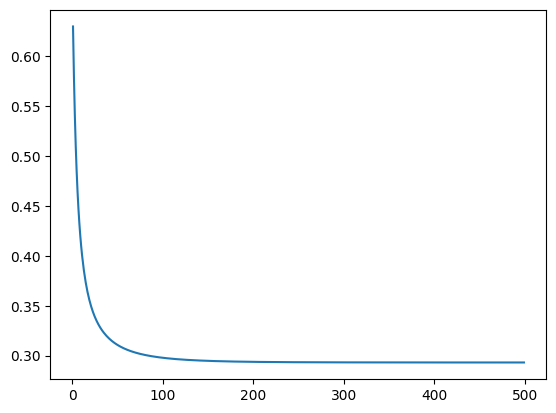

In [3]:
# To start, we obtain the default 90% train/test split of our data
X_train, X_test, y_train, y_test = bf.training_data(X, y, 1)
w_vec, b = lr.gradient_descent(500, X_train, y_train, 0.5, 0)

### Evaluation

In [4]:
# Evaluate linear model accuracy
lr.predict(X_test, y_test, w_vec, b)

Parameters of model are: [3.62721943] and -0.63624639900249
Model accuracy is 87.719%


### Talk about evaluation

# Two Features: Radius and Texture

### Visualization

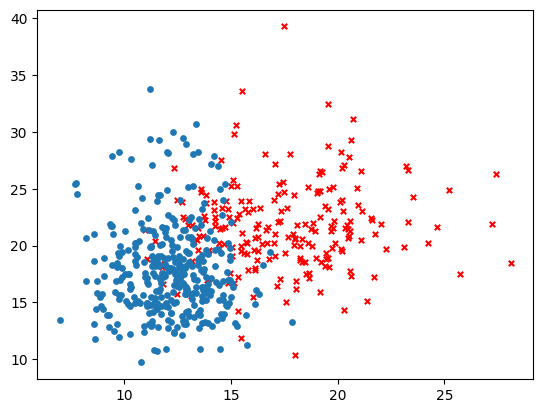

In [22]:
# Scatter plot of radius and texture
def malignant(i): return bool(i)
def benign(i): return not(bool(i))
mal, ben = np.vectorize(malignant)(y), np.vectorize(benign)(y)
X_mal, X_ben = X[:, 0:2][mal], X[:, 0:2][ben]

plt.scatter(X_mal[:, 0], X_mal[:, 1], marker="x", s=15, color="red", label="Malignant")
plt.scatter(X_ben[:, 0], X_ben[:, 1], marker="o", s=15, label="Benign")
plt.xlabel("Tumor Radius (mm)")
plt.ylabel("Tumor Texture (std of grayscale spots)")
plt.title("Tumor Radius-Texture Plot")
plt.show()
